In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import numpy as np


In [17]:
dt=datasets.load_iris()

In [18]:
X=pd.DataFrame(dt['data'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(dt.data, dt.target, test_size=0.25)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [20]:
y_pred = clf.predict(X_test)

In [21]:
accuracy=metrics.accuracy_score(y_test, y_pred)

In [22]:
print(accuracy)


0.973684210526


In [23]:
fig = plt.figure(figsize=(25,20))


In [24]:
import graphviz

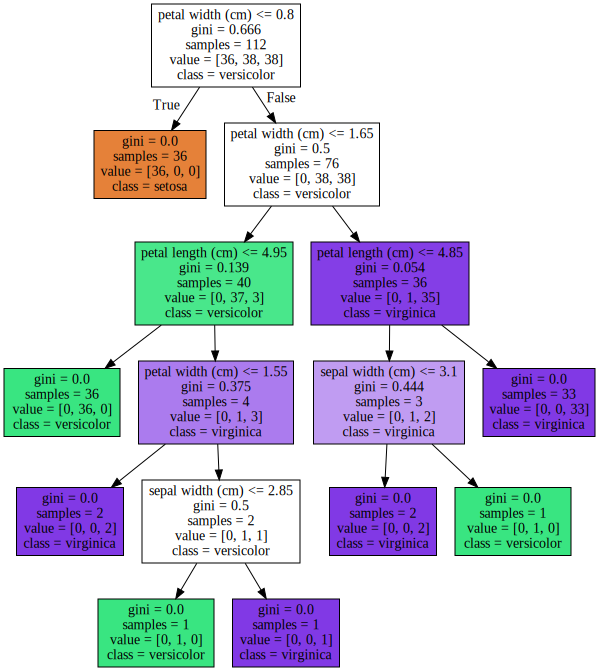

In [28]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=dt.feature_names,  
                                class_names=dt.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [27]:
diabetes1=pd.read_csv("diabetes.csv")

In [28]:
df=pd.DataFrame(diabetes1)

In [29]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
y=df.Outcome

In [31]:
x=df.drop('Outcome',axis=1)

In [8]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.25)

In [12]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train1, y_train1)
y_pred1 = clf.predict(X_test1)
accuracy1=metrics.accuracy_score(y_test1, y_pred1)

In [13]:
print(accuracy1)

0.682291666667


In [18]:
from sklearn.cluster import KMeans

In [28]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(x)

In [32]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
#print(len(labels))
#print(clusters)

In [33]:
for i in range(4):
    cat = (clusters == i)
    labels[cat] = mode(y[cat])[0]
#print(labels)    
acc = accuracy_score(y, labels)
print('Accuracy = ', acc)

Accuracy =  0.66015625


NameError: name 'X' is not defined

In [17]:
import xgboost

In [18]:
from xgboost import XGBClassifier

In [33]:
seed=7

In [34]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.25,random_state=seed)

In [36]:
xgb_model=XGBClassifier()

In [38]:
xgb_model.fit(X_train1,y_train1)

[12:50:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MSI\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=12, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [39]:
y_predict_xgb=xgb_model.predict(X_test1)

In [40]:
accuracy1=metrics.accuracy_score(y_test1, y_predict_xgb)

In [41]:
print(accuracy1)

0.734375
